    Req. Tracking Number is an identifier that is used for tracking shipments in Givaudan. The field itself however is a free text field therefore teams can enter anything. Sometimes, it is an identifier sometimes it is just “noise”. Other times teams are adding a date to this field to indicate when is the planned pick-up date.     
    
Write a script tha    t
-	loads all the files and keeps rows only where the column Req. Tracking Number is a valid date (dd mm yyyy, de-limiter does not matter)    . 
-	Display dates in the following format: yyyy-mm-    dd 
-	Additionally, indicate where the data is coming from (e.g. TrackingNumberDat    a 4)
-	Name Req. Tracking Number as Tracking Date


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings 
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.0f}'.format)
pd.set_option('display.max_seq_items', None)

In [4]:
df0 = pd.read_csv(r"C:\Users\lily\Desktop\DS interview prep\Givudan\Exercise2\Resource\TrackingNumberData 0.csv")
df1 = pd.read_csv(r"C:\Users\lily\Desktop\DS interview prep\Givudan\Exercise2\Resource\TrackingNumberData 1.csv")
df2 = pd.read_csv(r"C:\Users\lily\Desktop\DS interview prep\Givudan\Exercise2\Resource\TrackingNumberData 2.csv")
df3 = pd.read_csv(r"C:\Users\lily\Desktop\DS interview prep\Givudan\Exercise2\Resource\TrackingNumberData 3.csv")
df4 = pd.read_csv(r"C:\Users\lily\Desktop\DS interview prep\Givudan\Exercise2\Resource\TrackingNumberData 4.csv")
df5 = pd.read_csv(r"C:\Users\lily\Desktop\DS interview prep\Givudan\Exercise2\Resource\TrackingNumberData 5.csv")
df6 = pd.read_csv(r"C:\Users\lily\Desktop\DS interview prep\Givudan\Exercise2\Resource\TrackingNumberData 6.csv")

In [5]:
df0.head(3)

,Purchasing Document,Material,Plant,Req. Tracking Number
0,G552129,106,GOKH,12-12-2021
1,G766812,942855,YEUK,NaN
2,G563607,252897,RQDK,NaN


In [6]:
df1.head(3)

,Purchasing Document,Material,Plant,Req. Tracking Number
0,G651452,550150,LZ2H,NaN
1,G543684,169895,FAXO,NaN
2,G291011,849205,MXY2,NaN


In [7]:
df2.head(3)

,Purchasing Document,Material,Plant,Req. Tracking Number
0,G438572,852097,S92P,NaN
1,G307617,450959,FAXO,NaN
2,G233447,852097,98YX,NaN


In [8]:
df3.head(3)

,Purchasing Document,Material,Plant,Req. Tracking Number
0,G544603,677277,YEUK,NaN
1,G452402,705369,YEUK,NaN
2,G423850,625924,KRMD,NaN


In [9]:
df4.head(3)

,Purchasing Document,Material,Plant,Req. Tracking Number
0,G549444,448493,YEUK,NaN
1,G205617,535006,MXY2,NaN
2,G126659,870752,GOKH,NaN


In [10]:
df5.head(3)

,Purchasing Document,Material,Plant,Req. Tracking Number
0,G447400,413681,LZ2H,NaN
1,G626773,27481,N9KU,NaN
2,G522186,384101,MXY2,NaN


In [11]:
df6.head(3)

,Purchasing Document,Material,Plant,Req. Tracking Number
0,G218072,938329,YEUK,NaN
1,G711018,640695,RQUV,NaN
2,G415557,640695,RQUV,NaN


In [12]:
dataframes = [df0, df1, df2, df3, df4, df5, df6,]
table_names = ['TrackingNumberData 0.csv', 'TrackingNumberData 1.csv', 'TrackingNumberData 2.csv', 'TrackingNumberData 3.csv', 'TrackingNumberData 4.csv', 'TrackingNumberData 5.csv', 'TrackingNumberData 6.csv']

In [13]:
for df, name in zip(dataframes, table_names):
    df['Source'] = name

In [14]:
df = pd.concat(dataframes, ignore_index=True)
df 

,Purchasing Document,Material,Plant,Req. Tracking Number,Source
0,G552129,106,GOKH,12-12-2021,TrackingNumberData 0.csv
1,G766812,942855,YEUK,NaN,TrackingNumberData 0.csv
2,G563607,252897,RQDK,NaN,TrackingNumberData 0.csv
3,G367081,257329,0UCL,NaN,TrackingNumberData 0.csv
4,G835970,668578,98YX,NaN,TrackingNumberData 0.csv
...,...,...,...,...,...
179765,G632862,501042,A3RA,NaN,TrackingNumberData 6.csv
179766,G632862,501042,A3RA,NaN,TrackingNumberData 6.csv
179767,G280893,106459,7LEK,NaN,TrackingNumberData 6.csv
179768,G795204,827466,7LEK,NaN,TrackingNumberData 6.csv


In [15]:
df = df.rename({'Req. Tracking Number': 'Tracking Date'}, axis=1)
df .head()

,Purchasing Document,Material,Plant,Tracking Date,Source
0,G552129,106,GOKH,12-12-2021,TrackingNumberData 0.csv
1,G766812,942855,YEUK,NaN,TrackingNumberData 0.csv
2,G563607,252897,RQDK,NaN,TrackingNumberData 0.csv
3,G367081,257329,0UCL,NaN,TrackingNumberData 0.csv
4,G835970,668578,98YX,NaN,TrackingNumberData 0.csv


In [16]:
duplicates = df[df.duplicated(keep=False)]
duplicates.head()

,Purchasing Document,Material,Plant,Tracking Date,Source
101,G182132,239879,RQDK,NaN,TrackingNumberData 0.csv
102,G182132,239879,RQDK,NaN,TrackingNumberData 0.csv
103,G611285,239879,RQDK,NaN,TrackingNumberData 0.csv
104,G611285,239879,RQDK,NaN,TrackingNumberData 0.csv
229,G595128,487585,0UCL,NaN,TrackingNumberData 0.csv


In [17]:
len(duplicates)

8453

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df['Tracking Date'].nunique()

13681

In [20]:
df['Tracking Date'].unique()[:100]

array(['12-12-2021', nan, 'A', '*', '29.07.2021', '23.07.2021', 'TN',
       '13.07.2021', '03.09.2021', '14.07.2021', '02.07.2021', 'CL1/7',
       'MX02579I21', 'MX02622I21', '02.08.2021', '100136323',
       'MX02551I21', 'P94648', 'P93142', 'P94675', 'MX02549I21',
       '15.07.2021', '100064285', 'BR01988I21', 'MX02584I21',
       'MX02278I21', 'SA00497I21', '28.07.2021', 'AETD210709',
       'DELIV-0628', 'SA00488I21', 'MX02487I21', 'MX02484I21',
       'BR02047I21', '28.06.2021', 'SA00472I21', '19.07.2021',
       'MX02120I21', 'DONE', '27.07.2021', 'DELIV-0621', 'ETD 210712',
       'DELIV-0702', 'MX02346I21', 'MX02398I21', 'DELIV-0716',
       'MX02119I21', 'BR02035I21', 'CL28/5', 'BR01758I21', 'MX02026I21',
       'MX02317I21', 'ETD:17/7', 'DELIV-0601', 'MX02020I21', '08.11.2021',
       'SA00451I21', 'MX02339I21', 'ETD 210703', 'MX02153I21', 'ETD 28/6',
       'DELIV-0609', 'MX02256I21', 'MX02096I21', 'DELIV-0525', 'ETA 19/7',
       'ETA:15/6', 'BR01917I21', 'MX02343I21', '

In [22]:
def find_potential_dates(series):
    date_patterns = [
        r'\b\d{1,2}[./-]\d{1,2}[./-]\d{2,4}\b',  
        r'\b\d{4}[./-]\d{1,2}[./-]\d{1,2}\b',    
        r'\b\d{1,2}[ ]\w{3,9}[ ]\d{2,4}\b'      
    ]
    
    combined_pattern = '|'.join(date_patterns)
    potential_dates = series[series.str.contains(combined_pattern, na=False, regex=True)]
    return potential_dates.unique()

tracking_date_series = df['Tracking Date'].astype(str)

potential_dates = find_potential_dates(tracking_date_series)
potential_dates

array(['12-12-2021', '29.07.2021', '23.07.2021', '13.07.2021',
       '03.09.2021', '14.07.2021', '02.07.2021', '02.08.2021',
       '15.07.2021', '28.07.2021', '28.06.2021', '19.07.2021',
       '27.07.2021', '08.11.2021', '02.06.2021', '22.07.2021',
       '07.05.2021', '12.07.2021', '10.07.2021', '31.03.2021',
       '25.03.2021', '12.04.2021', '10.03.2021', '08.02.2021',
       '17.02.2021', '15.01.2021', '21.12.2020', '17.12.2020',
       '09.12.2020', '20.01.2021', '17.01.2021', '03.12.2020',
       '13.12.2020', '16.11.2020', '07.01.2021', '09.10.2020',
       '12.10.2020', '18.09.2020', '14.09.2020', '04.08.2020',
       '16.07.2020', '03.07.2020', '29.06.2020', '05.06.2020',
       '04.06.2020', '20.05.2020', '29.05.2020', '15.06.2020',
       '06/09/2021', '09/08/2021', '07/07/2021', '23.08.2021',
       '12/07/2021', '24/06/2021', '17/06/2021', '20/08/2021',
       '06.04.2021', '01.04.2021', '29.03.2021', '22.03.2021',
       '17.03.2021', '28.03.2021', '11.01.2021', '08.01

In [23]:
len(potential_dates)

828

#### Following type of formatting are presenet in the dataset:

-**'12-12-2021'**
-**'29.07.2021'**
-**'21.06.21'** (two digit year)
-**'02/07/2020'**
-**'8/1/2020'** 

*Note: I would like to find the row index for all these types of example, in order to be able to check it later.*

In [25]:
df[df['Tracking Date'] == '12-12-2021']

,Purchasing Document,Material,Plant,Tracking Date,Source
0,G552129,106,GOKH,12-12-2021,TrackingNumberData 0.csv


In [26]:
df[df['Tracking Date'] == '29.07.2021']

,Purchasing Document,Material,Plant,Tracking Date,Source
111,G341583,92246,RQDK,29.07.2021,TrackingNumberData 0.csv


In [27]:
df[df['Tracking Date'] == '21.06.21']

,Purchasing Document,Material,Plant,Tracking Date,Source
44541,G814339,473072,A3RA,21.06.21,TrackingNumberData 2.csv
100485,G869448,850375,GJEQ,21.06.21,TrackingNumberData 5.csv
101404,G606658,63979,GJEQ,21.06.21,TrackingNumberData 5.csv
102263,G501770,496970,A3RA,21.06.21,TrackingNumberData 5.csv
104358,G163847,496970,A3RA,21.06.21,TrackingNumberData 5.csv
138884,G800800,701318,GJEQ,21.06.21,TrackingNumberData 6.csv
141179,G255356,444588,A3RA,21.06.21,TrackingNumberData 6.csv


In [28]:
df[df['Tracking Date']== '02/07/2020']

,Purchasing Document,Material,Plant,Tracking Date,Source
73173,G805170,956430,8B1Z,02/07/2020,TrackingNumberData 3.csv


In [29]:
df[df['Tracking Date'] == '8/1/2020']

,Purchasing Document,Material,Plant,Tracking Date,Source
122255,G240927,250939,DGUE,8/1/2020,TrackingNumberData 5.csv


In [34]:
df['Tracking Date'] = df['Tracking Date'].str.replace(r'\.', '-', regex=True)  
df['Tracking Date'] = df['Tracking Date'].str.replace(r'/', '-', regex=True)  
df['Tracking Date']= df['Tracking Date'].str.replace(r'\s+\.', '', regex=True) 

In [35]:
final_df = df.copy()

In [36]:
final_df['Tracking Date'] = pd.to_datetime(final_df['Tracking Date'], errors='coerce', dayfirst=True) 

In [37]:
final_df['Tracking Date'] = final_df['Tracking Date'].dt.strftime('%Y-%m-%d')  

In [38]:
final_df2 = final_df[final_df['Tracking Date'].notna()]

In [39]:
final_df2 

,Purchasing Document,Material,Plant,Tracking Date,Source
0,G552129,106,GOKH,2021-12-12,TrackingNumberData 0.csv
111,G341583,92246,RQDK,2021-07-29,TrackingNumberData 0.csv
118,G358905,430999,AI3G,2021-07-23,TrackingNumberData 0.csv
361,G875946,257329,AI3G,2021-07-13,TrackingNumberData 0.csv
364,G639150,257329,S7NJ,2021-09-03,TrackingNumberData 0.csv
...,...,...,...,...,...
168814,G162171,496084,8B1Z,2019-06-27,TrackingNumberData 6.csv
169061,G217508,701318,8B1Z,2019-06-25,TrackingNumberData 6.csv
169245,G295304,423161,8B1Z,2019-05-03,TrackingNumberData 6.csv
171009,G262168,831809,3QH3,2019-06-26,TrackingNumberData 6.csv


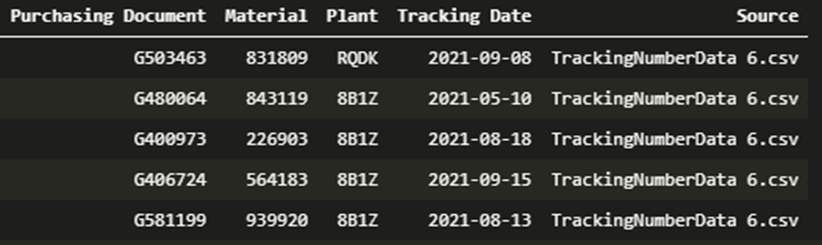

*Let's check the final formatting of the unique date values:*

In [40]:
final_df['Tracking Date'].unique()[:100]

array(['2021-12-12', nan, '2021-07-29', '2021-07-23', '2021-07-13',
       '2021-09-03', '2021-07-14', '2021-07-02', '2021-08-02',
       '2021-07-15', '2021-07-28', '2021-06-28', '2021-07-19',
       '2021-07-27', '2021-11-08', '2021-06-02', '2021-07-22',
       '2021-05-07', '2021-07-12', '2021-07-10', '2021-03-31',
       '2021-03-25', '2021-04-12', '2021-03-10', '2021-02-08',
       '2021-02-17', '2021-01-15', '2020-12-21', '2020-12-17',
       '2020-12-09', '2021-01-20', '2021-01-17', '2020-12-03',
       '2020-12-13', '2020-11-16', '2021-01-07', '2020-10-09',
       '2020-10-12', '2020-09-18', '2020-09-14', '2020-08-04',
       '2020-07-16', '2020-07-03', '2020-06-29', '2020-06-05',
       '2020-06-04', '2020-05-20', '2020-05-29', '2020-06-15',
       '2021-09-06', '2021-08-09', '2021-07-07', '2021-08-23',
       '2021-06-24', '2021-06-17', '2021-08-20', '2021-04-06',
       '2021-04-01', '2021-03-29', '2021-03-22', '2021-03-17',
       '2021-03-28', '2021-01-11', '2021-01-08', '

*Note: Even though the first 5 rows of the final dataset is not equal to ones from the screenshot, let's check if those are included in my final dataset:*

In [374]:
#G503463    G480064    G400973    G406724   G581199

In [41]:
final_df2[final_df2['Purchasing Document'] == 'G503463']

,Purchasing Document,Material,Plant,Tracking Date,Source
136838,G503463,831809,RQDK,2021-08-09,TrackingNumberData 6.csv


In [42]:
final_df2[final_df2['Purchasing Document'] == 'G480064']

,Purchasing Document,Material,Plant,Tracking Date,Source
136851,G480064,843119,8B1Z,2021-10-05,TrackingNumberData 6.csv


In [43]:
final_df[final_df['Purchasing Document'] == 'G480064']

,Purchasing Document,Material,Plant,Tracking Date,Source
63739,G480064,473072,72YJ,NaN,TrackingNumberData 2.csv
136851,G480064,843119,8B1Z,2021-10-05,TrackingNumberData 6.csv


In [44]:
final_df2[final_df2['Purchasing Document'] == 'G400973']

,Purchasing Document,Material,Plant,Tracking Date,Source
136856,G400973,226903,8B1Z,2021-08-18,TrackingNumberData 6.csv


In [45]:
final_df2[final_df2['Purchasing Document'] == 'G581199']

,Purchasing Document,Material,Plant,Tracking Date,Source
136870,G581199,939920,8B1Z,2021-08-13,TrackingNumberData 6.csv
